# Assignment 3-1. Beer Clustering

Cluster 20 beers using the hierarchical clustering method with complete linkage option.


## Data: 20 beers
- attributes: calories, sodium, alcohol, cost

In [32]:
# beer dataset
import pandas as pd

beer = pd.read_csv('beer.txt', sep=' ') # this file separated by ' ', not comma
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


We will cluster 20 beers with 4 attributes.

In [33]:
# define X
X = beer.drop('name', axis=1)
names = beer.name

Normalize feature scales to prevent a large-scale feature dominates the clustering results!

In [34]:
# center and scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We first define a function to visualize dendrogram.

In [35]:
from dendro import plot_dendrogram

## Problem 1. Dendrogram

Draw hierarchical clustering dendrogram with **complete linkage** option.

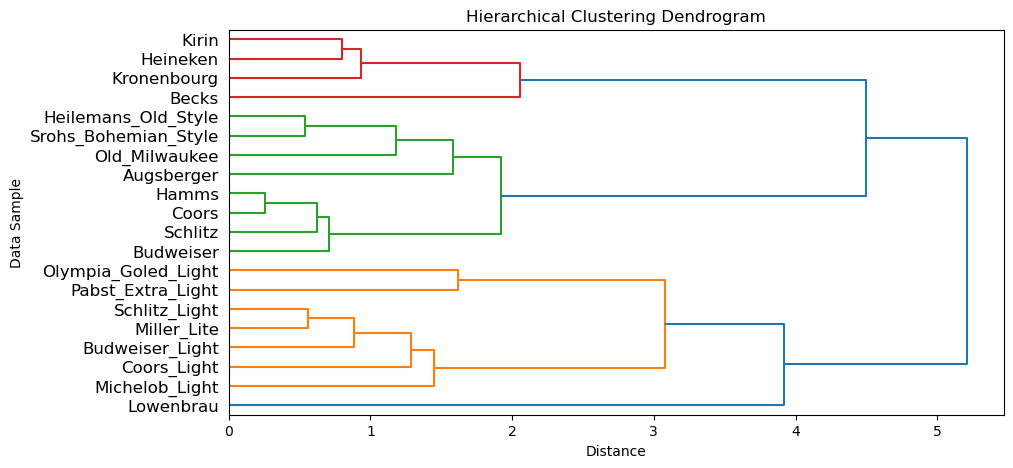

In [55]:
# your code here

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=None,
                               distance_threshold=0,
                               linkage='complete')
model.fit(X_scaled)
pic_dendrogram = plot_dendrogram(model, labels=names.tolist(), orientation='right')
pic_dendrogram


After drawing a plot such as dendrogram, histogram, etc., you can use `plt.savefig("dendrogram.png")` to save it as a file named `dendrogram.png`. This file will be located on the same folder.

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure('pic_dendrogram')
fig.savefig('dendrogram.png')


<Figure size 640x480 with 0 Axes>

#
#

## Problem 2. The number of clusters

Based on the dendrogram in Problem 1, what is the appropriate number of clusters?

In [57]:
# your code here
# ...

model = AgglomerativeClustering(n_clusters=5, linkage='complete')
model.fit(X_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [58]:
beer['cluster_hierarchical'] = model.labels_
beer.sort_values('cluster_hierarchical')

,name,calories,sodium,alcohol,cost,cluster_hierarchical
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
13,Becks,150,19,4.7,0.76,0
14,Kirin,149,6,5.0,0.79,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
0,Budweiser,144,15,4.7,0.43,2
1,Schlitz,151,19,4.9,0.43,2
5,Old_Milwaukee,145,23,4.6,0.28,2
6,Augsberger,175,24,5.5,0.40,2


In [59]:
beer.groupby('cluster_hierarchical').mean()

C:\Users\01wkd\AppData\Local\Temp\ipykernel_27160\3521399293.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  beer.groupby('cluster_hierarchical').mean()


,calories,sodium,alcohol,cost
cluster_hierarchical,,,,
0,155.250,10.750,4.9750,0.7625
1,70.000,10.500,2.6000,0.4200
2,148.375,21.125,4.7875,0.4075
3,157.000,15.000,0.9000,0.4800
4,109.200,10.200,4.1000,0.4520


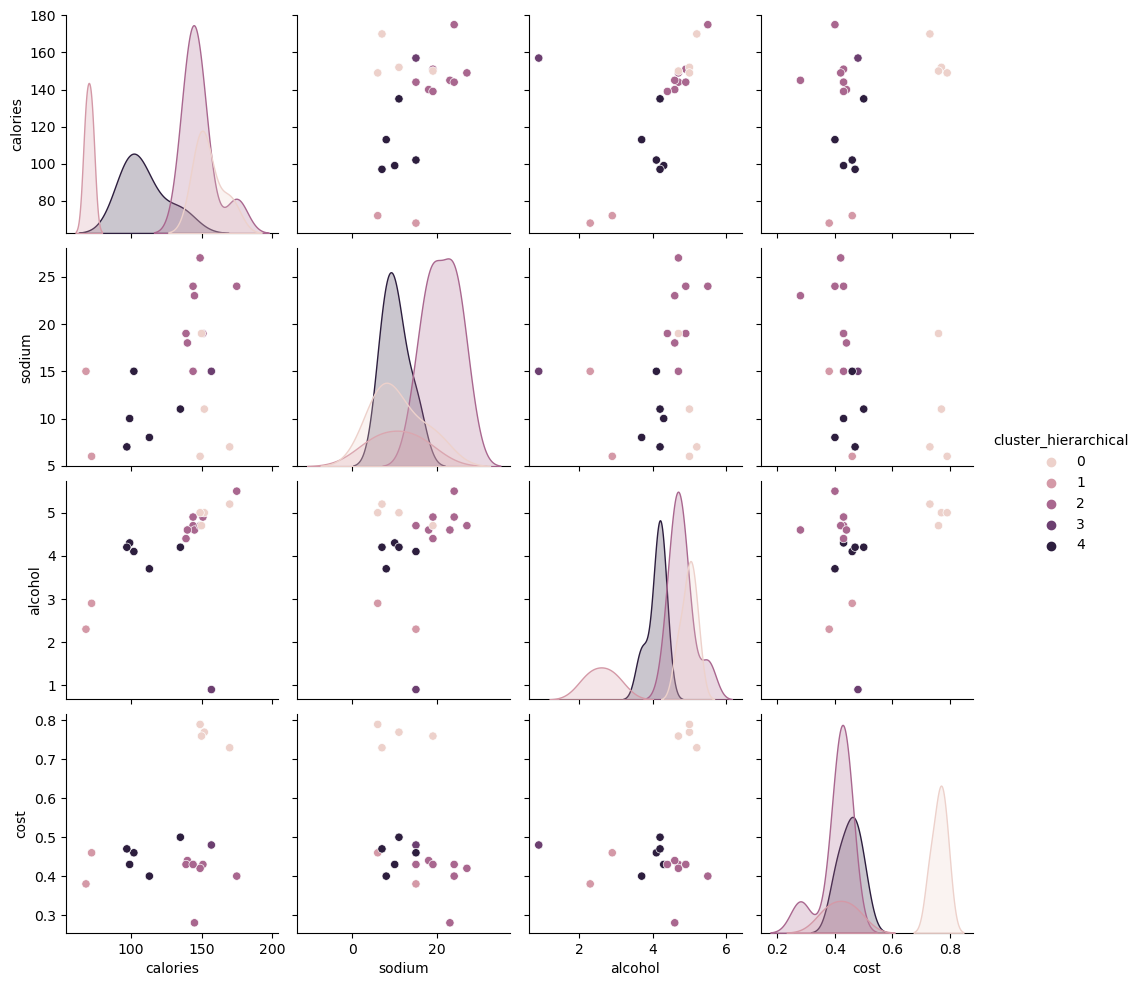

In [60]:
import seaborn as sns
sns.pairplot(beer, hue='cluster_hierarchical')

#
#

## Problem 3. The smallest cluster

Based on the result from problem 2, find the smallest cluster and list all beer names in the cluster.

In [ ]:
# your code here
# ...